In [3]:
# Documentação da API do Spotify: https://developer.spotify.com/documentation/web-api/
# Documentação de referências do Spotify: https://developer.spotify.com/documentation/web-api/reference/object-model/

import json
import spotipy
import spotipy.util as util
import pandas

# Carrega as credenciais da API do Spotify
# Nesse caso, as credenciais estão em um JSON salvo no mesmo diretório, que vai ser puxado pelo código
with open('credenciais_spotify.json') as cred_data:
    info = json.load(cred_data)
    username = info['username']
    client_id = info['client_id']
    client_secret = info['client_secret']
    redirect_uri = info['redirect_uri']
    scope = info['scope']

# Autorização e inicialização da spotipy
token = util.prompt_for_user_token(username = username, 
                                   scope = scope, 
                                   client_id = client_id, 
                                   client_secret = client_secret, 
                                   redirect_uri = redirect_uri)
sp = spotipy.Spotify(auth=token)

# Users must be set by the username or the ID number
usuarios = ["12148310296", "laranjeira.lucas", "galhardothami", "12142386765", "12147137853"]

planilha = []

# Percorre a lista de usuários e guarda as informações
for usuario in usuarios:
    user = sp.user(usuario)
    nome = user["display_name"]
    seguidores = user["followers"]
    total_seguidores = seguidores["total"]
    imagens = user["images"]
    lista_imagens = imagens[0]
    foto_perfil = lista_imagens["url"]
    
    # print(user) # Essa linha exibe o objeto da API com todos os dados do usuário no Spotify
    # print()
    
    print(f"Nome: {nome}")
    print(f"Seguidores: {total_seguidores}")
    print(f"Foto de perfil: {foto_perfil}")
    print()
    
    dicionario = {"nome": nome, "seguidores": total_seguidores, "foto_perfil": foto_perfil}
    planilha.append(dicionario)
    
df = pandas.DataFrame(planilha)
df.sort_values(by = "seguidores", ascending = False)

# Linha gera arquivo CSV com base no dataframe do pandas
# df.to_csv("spotify_usuarios.csv", sep=";", encoding='utf-8')

Nome: Caíque Alencar
Seguidores: 29
Foto de perfil: https://scontent.xx.fbcdn.net/v/t1.0-1/p200x200/25594013_1684320344992970_5938062906810404483_n.jpg?_nc_cat=111&_nc_ht=scontent.xx&oh=083b68a502db46e598f9f589d0f6a87d&oe=5CE20FC2

Nome: Lucas Fernandes Laranjeira
Seguidores: 81
Foto de perfil: https://platform-lookaside.fbsbx.com/platform/profilepic/?asid=666334030100226&height=200&width=200&ext=1552969597&hash=AeR3-JSS4gVaY-Lv

Nome: Thamiris Galhardo
Seguidores: 34
Foto de perfil: https://platform-lookaside.fbsbx.com/platform/profilepic/?asid=1688590968054018&height=200&width=200&ext=1552990530&hash=AeRijU7UE3VDNrcy

Nome: Matheus Angioleto Vezzani
Seguidores: 32
Foto de perfil: https://scontent.xx.fbcdn.net/v/t1.0-1/p200x200/50154994_2390295171043785_8035378615287808000_n.jpg?_nc_cat=100&_nc_ht=scontent.xx&oh=2437c07ea4df0647a56728f870aff4ca&oe=5CE26635

Nome: Guilherme Viana
Seguidores: 36
Foto de perfil: https://scontent.xx.fbcdn.net/v/t1.0-1/p200x200/44939944_1444186582380498_12

,foto_perfil,nome,seguidores
1,https://platform-lookaside.fbsbx.com/platform/...,Lucas Fernandes Laranjeira,81
4,https://scontent.xx.fbcdn.net/v/t1.0-1/p200x20...,Guilherme Viana,36
2,https://platform-lookaside.fbsbx.com/platform/...,Thamiris Galhardo,34
3,https://scontent.xx.fbcdn.net/v/t1.0-1/p200x20...,Matheus Angioleto Vezzani,32
0,https://scontent.xx.fbcdn.net/v/t1.0-1/p200x20...,Caíque Alencar,29


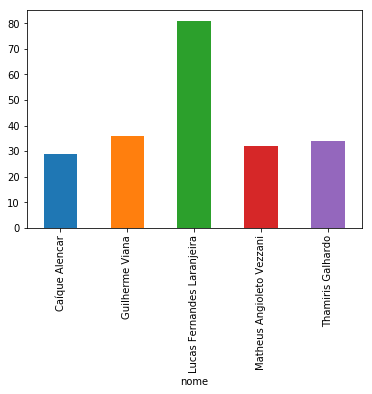

In [4]:
grafico_seguidores = df.groupby("nome")["seguidores"].mean()

%matplotlib inline
import matplotlib.pyplot as plt

grafico_seguidores.plot.bar()

# # Não precisa usar o comando get_figure() pra não imprimir o gráfico duas vezes
# grafico_seguidores.plot.bar().get_figure()